1 什么是特征值 特征向量(线性无关的彼此独立的)，

2   &lambda; 含义是么

3 普通矩阵的分解过程

4 对称矩阵的特性  矩阵的转置等于矩阵的置；特征向量线性无关，并且正交

矩阵分解中 大部分矩阵都不是方阵，也不是对称矩阵

5 奇异矩阵svd分解数学原理

 应用场景含义:svd是用来构造两个矩阵user和item矩阵
 
 svd 图像压缩，结合之前学的标准差评价方式对压缩结果评估
 
 在推荐系统中
   我们可以通过k来对矩阵降维
   第i个用户对第j个物品的评分
   完整的SVD，可以将M无损的分解成为三个矩
   为了简化矩阵分解，我们可以使用k，远小于min(m,n)，对矩阵M近似还原
   
 svd缺陷：
     SVD分解要求矩阵是稠密的 => 矩阵中的元素不能有缺失
     所以，类似于数据清洗，我们需要先对矩阵中的缺失元素进行补全  
     先有鸡，还是先有蛋。实际上传统SVD更适合做降维

    矩阵往往是稀疏的，大量缺失值 => 计算量大
    填充方式简单粗暴 => 噪音大
    

funckSVD与ALS 区别是优化方法不一样，funcksvd是梯度下降  als是交替最小二乘法

BasisSVD 对funcksvd的改进

SVD++ 改进了用户的隐式反馈

svd算法工具文档（网上有）


常用的推荐算法都有哪些（SVD算法在推荐系统算法中的位置）

普通矩阵分解原理

对称矩阵分解原理

奇异值分解SVD原理

如何使用Python进行SVD分解

使用SVD对图像进行压缩重构

传统SVD在推荐系统中的应用功能

funkSVD算法原理

BiasSVD算法原理

SVD++算法原理

Surprise中对应的SVD工具

Google Colab编辑器

基于内容的推荐（为酒店建立内容推荐系统）

什么是N-Gram

余弦相似度计算

CountVectorizer与TfidfVectorizer

Word Embedding

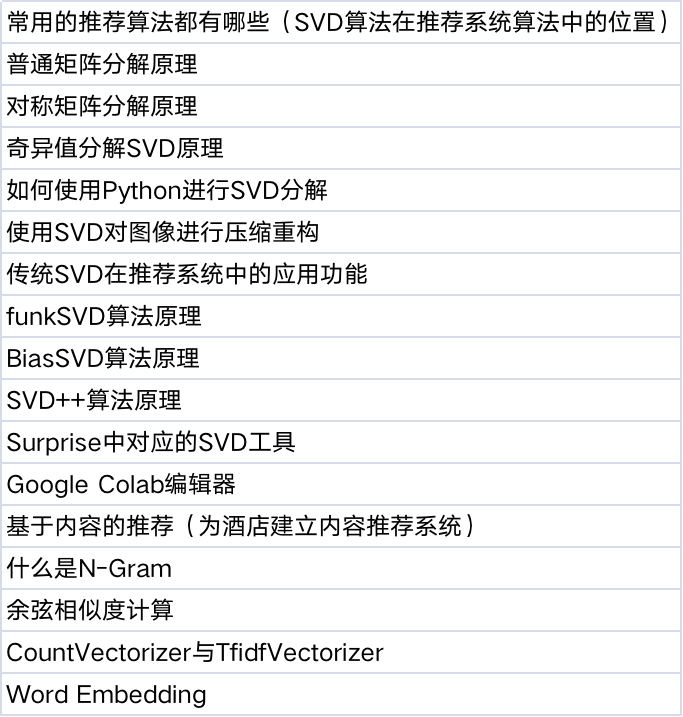




# 概述
    
    本堂课主要介绍了推荐系统机器学习中的基于隐语义矩阵分解模型模型的另外一种分解方式，奇异矩阵分解法svd。svd的数学原理以及缺点以及在推荐系统中的应用，和对它的改进方法funkSVD、BiasSVD、SVD++算法原理和Surprise中对应的SVD工具的使用

 

1 什么是特征值 特征向量(线性无关的彼此独立的)